In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file_path = '/Users/casey/Desktop/UChicago/Leadership/Ecommerce data.xlsx'

data = pd.ExcelFile(file_path)

df = data.parse('Sheet1')

In [3]:
rfm_data_full = df[['r', 'f', 'm']]

rfm_data_full.head()

,r,f,m
0,194,7,318.894775
1,3,14,368.052246
2,1489,15,423.298340
3,155,4,71.217041
4,194,6,442.638184


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Missing values with the mean for RFM features
imputer = SimpleImputer(strategy='mean')
rfm_imputed = imputer.fit_transform(rfm_data_full)

In [6]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_imputed)

#K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_clusters = kmeans.fit_predict(rfm_scaled)

rfm_data_full = rfm_data_full.copy()
rfm_data_full['Cluster'] = rfm_clusters

rfm_data_full.head()

,r,f,m,Cluster
0,194,7,318.894775,2
1,3,14,368.052246,1
2,1489,15,423.298340,0
3,155,4,71.217041,2
4,194,6,442.638184,2


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

rfm_data_full['Cluster'] = rfm_clusters

#Clusters with key characteristics
cluster_summary = rfm_data_full.groupby('Cluster').agg({
    'r': ['mean', 'median', 'std'],
    'f': ['mean', 'median', 'std'],
    'm': ['mean', 'median', 'std'],
}).round(2)

print("Cluster Summary for Key Characteristics:")
print(cluster_summary)

Cluster Summary for Key Characteristics:
               r                      f                       m             \
            mean  median     std   mean median   std       mean     median   
Cluster                                                                      
0        1394.96  1304.0  408.88   3.10    2.0  2.57     123.07      74.76   
1         190.53   104.0  217.21  20.90   18.0  9.85     816.53     583.48   
2         271.81   215.0  216.21   4.10    3.0  3.17     144.49      89.85   
3         116.67    90.0   65.23  10.67   11.0  7.51  389661.54  383349.50   

                    
               std  
Cluster             
0           166.54  
1          2482.01  
2           174.16  
3        140181.06  


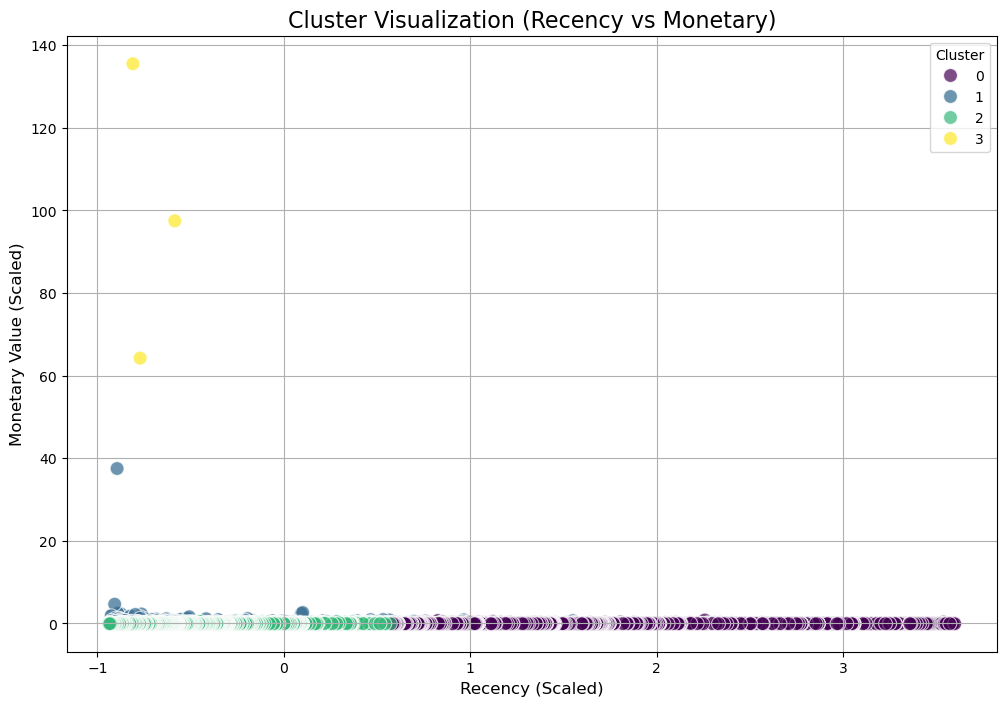

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=rfm_scaled[:, 0], 
    y=rfm_scaled[:, 2], 
    hue=rfm_clusters, 
    palette="viridis", 
    s=100, 
    alpha=0.7
)
plt.title('Cluster Visualization (Recency vs Monetary)', fontsize=16)
plt.xlabel('Recency (Scaled)', fontsize=12)
plt.ylabel('Monetary Value (Scaled)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()